## NLP Linear Regression

Libraries to consult for the following libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- Numpy: [Documentation](https://numpy.org/doc/)

**Importing documents into Google Colab:** introduction: [Introduction on medium](https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97).

In [1]:
## Import the necessary libraries
import pandas as pd
import numpy as np
import csv
import re
import string
from collections import defaultdict

In [2]:
with open('x_train.txt', encoding='utf-8') as f_xtrain:
    x_train = f_xtrain.read().splitlines()
with open('y_train.txt', encoding='utf-8') as f_ytrain:
    y_train = f_ytrain.read().splitlines()
with open('x_test.txt', encoding='utf-8') as f_xtest:
    x_test = f_xtest.read().splitlines()
with open('y_test.txt', encoding='utf-8') as f_ytest:
    y_test = f_ytest.read().splitlines()

In [3]:
#Check out the training data
print('Number of lines in x_train:', len(x_train))
print('Number of lines in y_train:', len(y_train))
print('lengths of the training set labels are the same:', len(x_train)==len(y_train))

Number of lines in x_train: 117500
Number of lines in y_train: 117500
lengths of the training set labels are the same: True


In [4]:
#Check out the test data
print('Number of lines in x_test:', len(x_test))
print('Number of lines in y_test:', len(y_test))
print('lengths of the test set labels are the same:', len(x_test)==len(y_test))

Number of lines in x_test: 117500
Number of lines in y_test: 117500
lengths of the test set labels are the same: True


In [5]:
# combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# combine x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# write test_df to csv with tab as separator
test_df.to_csv('test_df.csv', index=False, sep='\t')

In [6]:
## Check the first few elements, labels seem to match:
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [7]:
## Check now for test, labels seem to match:
test_df.head()

,text,label
0,Ne l fin de l seclo XIX l Japon era inda çconh...,mwl
1,Schiedam is gelegen tussen Rotterdam en Vlaard...,nld
2,"ГIурусаз батальонал, гьоркьор гIарадабиги лъун...",ava
3,ರಾಜ್ಯಶಾಸ್ತ್ರದ ಪಿತಾಮಹೆ ಅರಿಸ್ಟಾಟಲ್. ರಾಜ್ಯಶಾಸ್ತ್ರ...,tcy
4,Halukum adalah kelenjar tiroid nang menonjol d...,bjn


In [8]:
# get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

In [9]:
# T: Have a quick peek at the training data, looking at a couple of texts from different languages. Do you notice anything that might be challenging for the classification?
#Look at the full training data
train_df.head(30)

#An immediate difficulty would be the different character types: thai script, kanji, abugida and cyrillic are some evident ones.
# Other considerations:
# Parenthesis, punctuations, potential difference in morphosyntactic types, most labels are 3 characters long, but a few are strangely longer and might not be labels

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha
5,"Mudde 14, 2012tti, TNQ USA raxibacumab antiraa...",orm
6,"Kiribati is 't 174e land op de wereld, nao Saõ...",lim
7,He was a economics graduate from Elphinstone C...,guj
8,براعظم ایشیاء تے یورپ اتے پھیلے ہوئے دیس ترکی ...,pnb
9,Vanwehe zen Gentsen ofkomst wor 't een ok wè G...,zea


In [10]:
# T: How many instances per label are there in the training and test set?
labelcount = train_df['label'].tolist()
print(f'Total labels in the training dataset:', len(labelcount)) #117500 total labels in the training dataset

#Count if each label
values, counts = np.unique(labelcount, return_counts=True)

#print(values, counts)

#Zip them:
zippedtrain = zip(values, counts)
finalzip = list(zippedtrain)

print(f'Total number of unique labels:', len(values))

# Do you think this is a balanced dataset? Do you think the train/test split is appropriate? If not, please rearrange the data in a more appropriate way.
## There are 500 units of each label type. The number seems balanced for all the values since its the same for all.In real life,
## There are more resources for some languages compared to others so it doesn't really reflect realistic distributions.

Total labels in the training dataset: 117500
Total number of unique labels: 235


In [11]:
## Alternative way to see the number of unique labels:
train_df.label.value_counts()

est    500
eng    500
vep    500
sgs    500
uig    500
      ... 
lmo    500
mya    500
ilo    500
csb    500
ltz    500
Name: label, Length: 235, dtype: int64

In [12]:
# T: Get a subset of the train/test data that includes English, German, Dutch, Danish, Swedish and Norwegian, plus 20 additional languages of your choice (the labels can be found in the file labels.csv)
#Extract English
#print(values) #eng for english, deu for german, nld for dutch, dan for danish, swe for swedish, nno for norwegian

#English
onlyeng = train_df[train_df['label'] == 'eng']
#print(onlyeng) ## seems fine

#German
onlyger = train_df[train_df['label'] == 'deu']
#print(onlyger) ##all good

#Dutch
onlydutch = train_df[train_df['label'] == 'nld']
#print(onlydutch) ## Fine

#Danish
onlydanish = train_df[train_df['label'] == 'dan']
#print(onlydanish) ## done

#Swedish
onlyswedish = train_df[train_df['label'] == 'swe']
#print(onlyswedish) ## alright

#Norwegian
onlynorwegian = train_df[train_df['label'] == 'nno']
#print(onlynorwegian) ## Done

#Full subset with the 6 target languages and the 20 plus
subset_df = train_df.loc[train_df['label'].str.contains('eng|deu|nld|dan|swe|nno|est|zea|hat|tam|pan|ton|bod|arg|jpn|tur|pol|mkd|ace|bak|hun|ukr|san|nap|lug|sun', case=False, na=False)]
print(subset_df)

                                                     text label
0       Klement Gottwaldi surnukeha palsameeriti ning ...   est
1       Sebes, Joseph; Pereira Thomas (1961) (på eng)....   swe
9       Vanwehe zen Gentsen ofkomst wor 't een ok wè G...   zea
11      6 fevrye 1996 : Gouvènman ayisyen reprann kont...   hat
13      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...   tam
...                                                   ...   ...
117465  மூர்த்தி திருநாமம் :- அகிலாண்டேசுரர் அம்பாள் ப...   tam
117480  During World Class' golden era, Hart was also ...   eng
117482  ਪੰਜਾਬੀ ਸੱਭਿਆਚਾਰ ਤੇ ਆਧੁਨਿਕ ਪ੍ਰਭਾਵ ਕਾਰਨ ਸਮਾਜਿਕ ਰ...   pan
117492  2010 року серед 201 особи працездатного віку (...   ukr
117498  I det mindste opnåede Venedig den 18. april 14...   dan

[13000 rows x 2 columns]


In [13]:
## Alternative method:
### WILL BE USED FOR THE MODELLING ###
## randomly sample 20 different target labels and create subsets of train and test dataframes with only those labels
selectfirst_labels = set(['eng', 'deu', 'nld', 'dan', 'swe', 'nno'])
fullset_labels = set(train_df['label'].unique())
addedtwenty_labels = list(np.random.choice(list(fullset_labels - selectfirst_labels), 20, replace=False))
addedtwenty_labels += selectfirst_labels
trainsub_df = train_df[train_df['label'].isin(addedtwenty_labels)]
testsub_df = test_df[test_df['label'].isin(addedtwenty_labels)]

In [14]:
## Check the alternative pieces:
print(selectfirst_labels)
print(addedtwenty_labels)
print('should be 6 + 20 total subset of labels:', len(addedtwenty_labels))

{'nno', 'nld', 'dan', 'deu', 'swe', 'eng'}
['sna', 'lad', 'fao', 'tet', 'krc', 'jav', 'swa', 'mdf', 'lim', 'wol', 'ben', 'lez', 'lit', 'mwl', 'bxr', 'mri', 'chr', 'ori', 'jbo', 'hin', 'nno', 'nld', 'dan', 'deu', 'swe', 'eng']
should be 6 + 20 total subset of labels: 26


In [15]:
#Create a .csv
subset_df.to_csv('subset_df.csv', index=False, sep='\t')

#Read the head
subset_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
9,Vanwehe zen Gentsen ofkomst wor 't een ok wè G...,zea
11,6 fevrye 1996 : Gouvènman ayisyen reprann kont...,hat
13,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,tam


In [16]:
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

#print(train_df['label'])
alllabels = train_df['label'].unique()
#print(type(alllabels))

le = LabelEncoder()

le.fit(alllabels)

le_fitted = LabelEncoder().fit(train_df['label'])

##checking how each function operates alone
classif = list(le.classes_)
#print(classif)

transformation = le.transform(classif)
#print(transformation)

#print(train_df['label'])
#print(test_df['label'])

y_train_dev, y_test = le_fitted.fit_transform(train_df['label']), le_fitted.fit_transform(test_df['label'])

print('encoding results for train_df:', y_train_dev)
print('encoding results for test_df:', y_test)

#alternate tool:
y_train_dev2, y_test2 = le_fitted.transform(train_df['label']), le_fitted.transform(test_df['label'])
#print(y_train_dev2, y_test2) ## Exactly the same results

encoding results for train_df: [ 52 198 124 ... 123  42  87]
encoding results for test_df: [138 150  10 ...  99 167 153]


<b> Special: Making 2 subsets, one from the original and one from the alternative set <b>

In [17]:
# Encoding for the subset variant:
y_train_dev_sub = le_fitted.transform(trainsub_df['label'])
y_test_sub = le_fitted.transform(testsub_df['label'])

In [18]:
## Double checking:
print(le_fitted.classes_)
print(len(le_fitted.classes_))

['ace' 'afr' 'als' 'amh' 'ang' 'ara' 'arg' 'arz' 'asm' 'ast' 'ava' 'aym'
 'azb' 'aze' 'bak' 'bar' 'bcl' 'be-tarask' 'bel' 'ben' 'bho' 'bjn' 'bod'
 'bos' 'bpy' 'bre' 'bul' 'bxr' 'cat' 'cbk' 'cdo' 'ceb' 'ces' 'che' 'chr'
 'chv' 'ckb' 'cor' 'cos' 'crh' 'csb' 'cym' 'dan' 'deu' 'diq' 'div' 'dsb'
 'dty' 'egl' 'ell' 'eng' 'epo' 'est' 'eus' 'ext' 'fao' 'fas' 'fin' 'fra'
 'frp' 'fry' 'fur' 'gag' 'gla' 'gle' 'glg' 'glk' 'glv' 'grn' 'guj' 'hak'
 'hat' 'hau' 'hbs' 'heb' 'hif' 'hin' 'hrv' 'hsb' 'hun' 'hye' 'ibo' 'ido'
 'ile' 'ilo' 'ina' 'ind' 'isl' 'ita' 'jam' 'jav' 'jbo' 'jpn' 'kaa' 'kab'
 'kan' 'kat' 'kaz' 'kbd' 'khm' 'kin' 'kir' 'koi' 'kok' 'kom' 'kor' 'krc'
 'ksh' 'kur' 'lad' 'lao' 'lat' 'lav' 'lez' 'lij' 'lim' 'lin' 'lit' 'lmo'
 'lrc' 'ltg' 'ltz' 'lug' 'lzh' 'mai' 'mal' 'map-bms' 'mar' 'mdf' 'mhr'
 'min' 'mkd' 'mlg' 'mlt' 'mon' 'mri' 'mrj' 'msa' 'mwl' 'mya' 'myv' 'mzn'
 'nan' 'nap' 'nav' 'nci' 'nds' 'nds-nl' 'nep' 'new' 'nld' 'nno' 'nob'
 'nrm' 'nso' 'oci' 'olo' 'ori' 'orm' 'oss' 'pag' 'pam' '

<b> Chapter 2: Custom Linguistic feature extraction and components for the pipeline = Using on the Alternative SUBSET 2 <b>

In [19]:
## Label Process ## Feature hunting:
## Building the pipeline: ##
## Training the classifier for Logistic Regression ##

# Import all items of potential use:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

## Additionals:
from sklearn.base import TransformerMixin ## MOST IMPORTANT NEEDED TO EXTRACT TEXT FEATURE ENGINEERING
from sklearn.preprocessing import MinMaxScaler # Needed for scaler

In [20]:
## Main features to try to extract from:

## Feature Extraction piece number 1: Average word length count:
class Avgwordlength(TransformerMixin):
    def __init__(self):
        pass

    def average_word_length(self, text):
        return np.mean([len(word) for word in text.split()])

    def transform(self, X, y=None):
        lens = X.apply(self.average_word_length)
        lens = lens.tolist()
        return np.reshape(lens, (-1, 1))

    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self, features):
        return ["word_length"]

## Feature Extraction piece number 2: Bigram counts:
class BigramHunter(TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def _to_bigrams(self, text):
        return [bg[0] + bg[1] for bg in zip(text, text[1:])]

    def _count_bigrams(self, text):
        return len(self._to_bigrams(text))

    def transform(self, X, y=None):
        numerical_features = np.array([self._count_bigrams(text) for text in X])
        return numerical_features.reshape(-1, 1)

    def fit(self, X, y=None):
        numerical_features = np.array([self._count_bigrams(text) for text in X])
        self.scaler.fit(numerical_features.reshape(-1, 1))
        return self

# Example usage:
# feature_extractor = FeatureExtractor()
# feature_extractor.fit(train_data)
# transformed_features = feature_extractor.transform(test_data)

## Feature Extraction piece number 3: count of bigrams where the letters are the same:
class DoubleSeeker(TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def _to_same_letter_bigrams(self, text):
        return [bg[0] + bg[1] for bg in zip(text, text[1:]) if bg[0] == bg[1]]

    def _count_same_letter_bigrams(self, text):
        return len(self._to_same_letter_bigrams(text))

    def transform(self, X, y=None):
        numerical_features = np.array([self._count_same_letter_bigrams(text) for text in X])
        return numerical_features.reshape(-1, 1)

    def fit(self, X, y=None):
        numerical_features = np.array([self._count_same_letter_bigrams(text) for text in X])
        self.scaler.fit(numerical_features.reshape(-1, 1))
        return self

## Feature Extraction piece number 4: POS counts:
class POScount(TransformerMixin):
    def transform(self, X, y=None):
        all_tags = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
        pos_matrix = []  # Initializing the variable here

        for text in X:
            pos_tags = [pos for _, pos in nltk.pos_tag(nltk.word_tokenize(text))]
            pos_freq = nltk.FreqDist(pos_tags)
            row = [pos_freq.get(tag, 0) for tag in all_tags]
            pos_matrix.append(row)

        return np.array(pos_matrix)

    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self, input_features=None):
        all_tags = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
        return [tag for tag in all_tags]


In [21]:
#2. Create a suitable pipeline in sklearn to preprocess the data. Think about
# extending the feature space.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion ## Extend feature space:

text_clf = Pipeline([
    ('feats', FeatureUnion([
        ('vect', CountVectorizer(analyzer="char")), ##Analyzer set to reading only each character
        ('bigrm', BigramHunter()),
        ('doubs', DoubleSeeker()),
        ('ave', Avgwordlength()),
        ('pos', POScount())
    ])),
    ('clf', LogisticRegression(solver='liblinear'))
])

In [22]:
## Check if it runs:
print(text_clf)

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('vect',
                                                 CountVectorizer(analyzer='char')),
                                                ('bigrm',
                                                 <__main__.BigramHunter object at 0x000002663330F9D0>),
                                                ('doubs',
                                                 <__main__.DoubleSeeker object at 0x000002663330FC10>),
                                                ('ave',
                                                 <__main__.Avgwordlength object at 0x000002663330FCD0>),
                                                ('pos',
                                                 <__main__.POScount object at 0x000002663330F1F0>)])),
                ('clf', LogisticRegression(solver='liblinear'))])


In [23]:
# Train the following classifier: LogisticRegression
## Use the created SECOND subset from before:
#Import NLTK
import nltk

X_train = trainsub_df['text']
X_test = testsub_df['text']

text_clf.fit(X_train, y_train_dev_sub)

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('vect',
                                                 CountVectorizer(analyzer='char')),
                                                ('bigrm',
                                                 <__main__.BigramHunter object at 0x000002663330F9D0>),
                                                ('doubs',
                                                 <__main__.DoubleSeeker object at 0x000002663330FC10>),
                                                ('ave',
                                                 <__main__.Avgwordlength object at 0x000002663330FCD0>),
                                                ('pos',
                                                 <__main__.POScount object at 0x000002663330F1F0>)])),
                ('clf', LogisticRegression(solver='liblinear'))])

In [24]:
## Check the performance:
text_clf.score(X_test, y_test_sub)

### 3 features including length, bigram and POS count results in 0.9624615384615385 which is ok.
### 4 features with word length, bigram, double letters and POS counts results in 0.9627692307692308 but slightly better.

0.9641538461538461

<b> Chapter 3 GridSearch usage = Using the first subset that was built previously since it has fixed choices of languages <b>

In [25]:
## Building the pipeline: ##
### Main task 2: ###
### NOTA BENE: USING THE FIRST SUBSET ###
## Training the classifier for Logistic Regression ##

# Import all items of potential use:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

#Finding the best model automatically:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

#Split the new subset data:
X_train, X_test, y_train, y_test = train_test_split(subset_df['text'], subset_df['label'], test_size=0.2, random_state=42)

# Display the shapes of the train/test sets
print("Training data (text): ", X_train.shape)
print("Test data (text): ", X_test.shape)
print("Training labels: ", y_train.shape)
print("Test labels: ", y_test.shape)

#Summon pipeline TfidVectorizer with 2 functions in 1 is a better option
model = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)
#See if active
print(model)


#using .fit to adjust
fitting = model.fit(X_train, y_train)

Training data (text):  (10400,)
Test data (text):  (2600,)
Training labels:  (10400,)
Test labels:  (2600,)
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])


In [26]:
#Check score
from sklearn.model_selection import cross_val_score
#Do only 5 folds since it takes a very long time with anything more than 5...default is 5
outputscore = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print('the scores generated are:', outputscore)

the scores generated are: [0.96778846 0.96875    0.97644231 0.97740385 0.97451923]


In [27]:
predictions = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy:  0.9715384615384616
Classification Report:
               precision    recall  f1-score   support

         ace       1.00      0.97      0.99       105
         arg       0.97      0.99      0.98       106
         bak       1.00      0.94      0.97        96
         bod       1.00      0.98      0.99       106
         dan       1.00      0.97      0.98       115
         deu       0.97      0.98      0.97        92
         eng       0.83      1.00      0.91        84
         est       0.98      0.96      0.97        98
         hat       1.00      1.00      1.00       112
         hun       1.00      0.94      0.97        97
         jpn       0.72      0.92      0.81        97
         lug       1.00      0.98      0.99        95
         mkd       1.00      0.97      0.98       115
         nap       0.99      0.99      0.99        93
         nld       0.95      0.94      0.95       101
         nno       0.98      0.97      0.98       103
         pan       1.00    

In [28]:
#Extra: Trying with pipeline builder from provided notebook:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

text_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC())
])

#See if it activates
print(text_svc)

#Implement parameters
param_grid = {'vect__ngram_range': [(1, 1), (1, 2)],
             'svc__loss': ['hinge', 'squared_hinge'],
             'svc__multi_class': ['ovr', 'crammer_singer']}

#GridSearchCV for best model type: Reduced folds to 3 for faster work
gs_svc = GridSearchCV(text_svc, param_grid, cv=5, n_jobs=4, verbose=1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC())])


In [29]:
gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Argent\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('svc', LinearSVC())]),
             n_jobs=4,
             param_grid={'svc__loss': ['hinge', 'squared_hinge'],
                         'svc__multi_class': ['ovr', 'crammer_singer'],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [30]:
gs_svc.predict(X_train)

array(['zea', 'bod', 'nap', ..., 'ukr', 'zea', 'hun'], dtype=object)

In [31]:
best_model = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))
])

#Activate this instead:
print(best_model)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))])


In [32]:
best_model.fit(X_train, y_train)

C:\Users\Argent\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))])

In [33]:
best_model.predict(X_test)

array(['deu', 'mkd', 'pan', ..., 'lug', 'zea', 'ukr'], dtype=object)

In [34]:
##Final results:
print("Best Estimator:{}".format(gs_svc.best_estimator_))
print("Best Parameters:{}".format(gs_svc.best_params_))
print("Best Test Score:{}".format(gs_svc.best_score_))

## What other features could you use to determine the language?
# SVO or SOV syntax format
# Larger N-gram
# Common suffixes (supported with n-gram evaluation)
# Character type (distinction between character based languages and non-character ex. Hangyul, Chinese and Japanese vs. other)
# Separators used (punctuation or lack of punctuation/spacing)

Best Estimator:Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))])
Best Parameters:{'svc__loss': 'hinge', 'svc__multi_class': 'crammer_singer', 'vect__ngram_range': (1, 1)}
Best Test Score:0.9825961538461538


In [35]:
##Finding optimal hyperparameter settings:##

## We have 2 options for penalty, the loss l1 and l2
## For solver we have the following options: lbfgs(default) for l2, liblinear l1 and l2
## newton-cg for l2, newton-cholesky for l2, sag for l2 and saga for elasticnet, l1 and l2

#What is expected to look like
optiparam_grid = {
    "penalty": ["l1"],
    "solver": ["liblinear"]
}

print(optiparam_grid)

{'penalty': ['l1'], 'solver': ['liblinear']}


In [36]:
# Sort out the subset dataframe:
subset_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
9,Vanwehe zen Gentsen ofkomst wor 't een ok wè G...,zea
11,6 fevrye 1996 : Gouvènman ayisyen reprann kont...,hat
13,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,tam


In [37]:
#Build the X and the y from the subset dataframe
X = subset_df['text']
y = subset_df['label']

#Check out
print(X)
print(y)

0         Klement Gottwaldi surnukeha palsameeriti ning ...
1         Sebes, Joseph; Pereira Thomas (1961) (på eng)....
9         Vanwehe zen Gentsen ofkomst wor 't een ok wè G...
11        6 fevrye 1996 : Gouvènman ayisyen reprann kont...
13        விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
                                ...                        
117465    மூர்த்தி திருநாமம் :- அகிலாண்டேசுரர் அம்பாள் ப...
117480    During World Class' golden era, Hart was also ...
117482    ਪੰਜਾਬੀ ਸੱਭਿਆਚਾਰ ਤੇ ਆਧੁਨਿਕ ਪ੍ਰਭਾਵ ਕਾਰਨ ਸਮਾਜਿਕ ਰ...
117492    2010 року серед 201 особи працездатного віку (...
117498    I det mindste opnåede Venedig den 18. april 14...
Name: text, Length: 13000, dtype: object
0         est
1         swe
9         zea
11        hat
13        tam
         ... 
117465    tam
117480    eng
117482    pan
117492    ukr
117498    dan
Name: label, Length: 13000, dtype: object


In [38]:
# Activate packages of interest:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
# Use TFIDF and Logistic Regression again
text_clf2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

print(text_clf2)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])


In [40]:
# Param grid with the penalties and possible solvers
## lbfgs is the default but liblinear is selected since its recommended for smaller datasets
new_param_grid = {
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf__penalty': ['l1', 'l2'],
}

print(new_param_grid)

{'clf__solver': ['liblinear', 'lbfgs'], 'clf__penalty': ['l1', 'l2']}


In [41]:
#Run the parameters
## Reduced cv to avoid taking too long
## n_jobs adjusted
exp_grid_search = GridSearchCV(text_clf2, new_param_grid, cv=3, n_jobs=-1)
exp_grid_search.fit(X, y)

#6 fits out of a total of 18 have failed
## Therefore 12 have succeeded

C:\Users\Argent\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Argent\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Argent\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Argent\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__penalty': ['l1', 'l2'],
                         'clf__solver': ['liblinear', 'lbfgs']})

In [42]:
#Checking the best parameters
best_params = exp_grid_search.best_params_
print("Best Parameters:", best_params)

#And the best estimate model:
recommended_model = exp_grid_search.best_estimator_
print("Best model to use:", best_model)

## Seems like the best penalty type is l2 Ridge (squared loss) penalty while the recommended solver is liblinear.
## The best model confirms we used the optimal tools which are TFIDF Vectorizer and Logistic Regression

Best Parameters: {'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best model to use: Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))])


In [43]:
### Now we craft the confusion matrix for the task:
# First we split the subset dataframe:
from sklearn.model_selection import train_test_split

#Now we will split the subset again:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check if it even works:
recommended_model.fit(X_train, y_train)
print(recommended_model.fit(X_train, y_train))

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(solver='liblinear'))])


In [44]:
#Make a prediction set for the confusion matrix
y_prediction = best_model.predict(X_test)

#Labels are generated:
print(y_prediction)

['deu' 'mkd' 'pan' ... 'lug' 'zea' 'ukr']


In [45]:
#Make labels for subsets:
le_fitted = LabelEncoder().fit(subset_df['label'])

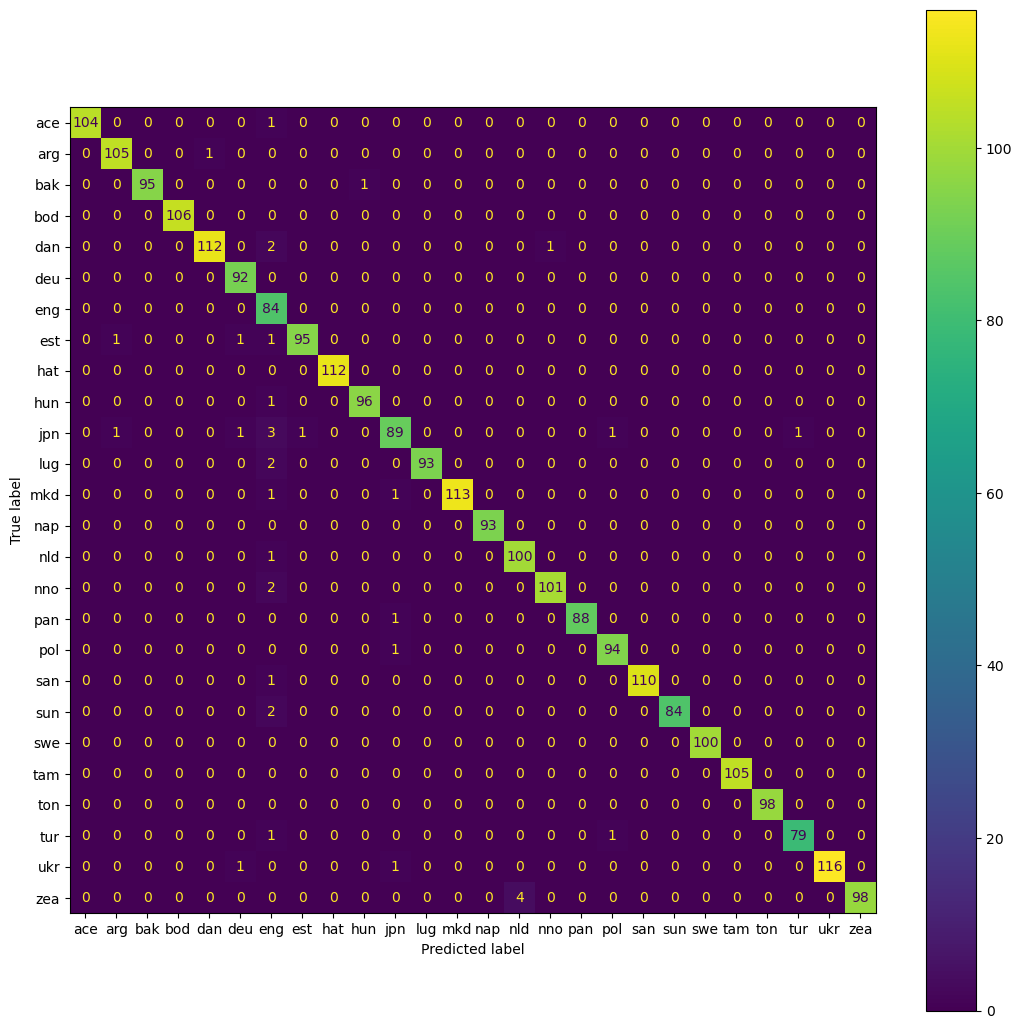

In [46]:
#Import the confusion matrix kit:
## Also added all other metrics used in the SKLearn guides
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay ## Added for better visuals
import matplotlib.pyplot as plt

confusmatrix = confusion_matrix(y_test, y_prediction)
see_it = ConfusionMatrixDisplay(confusion_matrix=confusmatrix,
                              display_labels=le_fitted.classes_)
figure, ax = plt.subplots(figsize=(13,13))
see_it.plot(ax=ax)

## The results are the following:

In [47]:
# Finding accuracy (not very useful):
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy:', accuracy)

## 0.9853846153846154 accuracy established like before

Accuracy: 0.9853846153846154


In [48]:
# Calculate precision, recall, and F1-score in the same manner as in the provided SKLearn guides
precision = precision_score(y_test, y_prediction, average='micro')
recall = recall_score(y_test, y_prediction, average='micro')
f1 = f1_score(y_test, y_prediction, average='micro')

print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

### They are all the same but generally means that the results are rather robust

precision: 0.9853846153846154
recall: 0.9853846153846154
f1: 0.9853846153846154


<b> Chapter 4: Working with ELI5 <b>

In [49]:
### Experiment with ELI5
### Languages: English, Swedish, Norwegian and Japanese
import eli5

In [50]:
## Now we take the main dataset, then we extract only the four languages of interest

#English
onlyeng = train_df[train_df['label'] == 'eng']
#print(onlyeng) ## seems fine

#Swedish
onlyswede = train_df[train_df['label'] == 'swe']
#print(onlyswede) ## Works alright

#Norwegian
onlynorway = train_df[train_df['label'] == 'nno']
#print(onlynorway) ## ok

#Japanese
onlyjapan = train_df[train_df['label'] == 'jpn']
#print(onlyjapan) ## Done

## Craft the dataset with only the four languages
eli5_subset_df = train_df.loc[train_df['label'].str.contains('eng|swe|nno|jpn', case=False, na=False)]
print(eli5_subset_df)

                                                     text label
1       Sebes, Joseph; Pereira Thomas (1961) (på eng)....   swe
29      エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...   jpn
46      シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとR&Tマーティン高校...   jpn
225     藤女の女性教師。48歳。数学担当。風紀指導を担当しており、リコにとっては天敵。藤女とその伝統...   jpn
269     In 1978 Johnson was awarded an American Instit...   eng
...                                                   ...   ...
117135  実質的にはBRAVIA Phone U1とS002の後継にあたる2軸折りたたみ式の機種で今回...   jpn
117148  京都市バス等持院道バス停徒歩すぐところに位置する。地上4階建。寮室190室、アクセシブルルー...   jpn
117176  Han vart spelt inn for BBC In Concert-showet m...   nno
117207  Fotopoulos describes Inclusive Democracy as "a...   eng
117480  During World Class' golden era, Hart was also ...   eng

[2000 rows x 2 columns]


In [51]:
#Create a .csv for the 4 language chosen:
eli5_subset_df.to_csv('elisubset_df.csv', index=False, sep='\t')

#Read the head of the eli5 doc:
eli5_subset_df.head()

,text,label
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
29,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,jpn
46,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとR&Tマーティン高校...,jpn
225,藤女の女性教師。48歳。数学担当。風紀指導を担当しており、リコにとっては天敵。藤女とその伝統...,jpn
269,In 1978 Johnson was awarded an American Instit...,eng


In [52]:
#Apply classic splitting for test and train in X and Y:
#Split the new subset data:
eli_x_train, eli_x_test, eli_y_train, eli_y_test = train_test_split(eli5_subset_df['text'], eli5_subset_df['label'], test_size=0.2, random_state=42)

#Check em out:
print(eli_x_train.shape)
print(eli_x_test.shape)
print(eli_y_train.shape)
print(eli_y_test.shape)

##Alright, let's proceed


(1600,)
(400,)
(1600,)
(400,)


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

#Run the usual pipeline format:
vec = CountVectorizer()
clf = LogisticRegressionCV()
pipe = make_pipeline(vec, clf)

In [54]:
pipe.fit(eli_x_train, eli_y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregressioncv', LogisticRegressionCV())])

In [55]:
#Following eli5 official guide for metrics
from sklearn import metrics

def print_report(pipe):
    y_test = eli_y_train
    y_pred = pipe.predict(eli_x_train)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe)

              precision    recall  f1-score   support

         eng       1.00      1.00      1.00       399
         jpn       1.00      1.00      1.00       403
         nno       1.00      1.00      1.00       399
         swe       1.00      1.00      1.00       399

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

accuracy: 1.000


In [56]:
## Check out the weights in basic manner:
# Top 10 features selected
eli5.show_weights(clf, top=10)

## Difficult to read anything

In [57]:
eli5.show_weights(clf, vec=vec, top=10)
# A bit better now, interestingly we can definitely see the most prominent feature of each language
# (or lack of in Japanese)

C:\Users\Argent\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
